In [1]:
from sympy import init_printing
#init_printing(use_latex='png', scale=1.05, order='grlex',
#              forecolor='Black', backcolor='White', fontsize=10)

from sympy import diff, Symbol

In [2]:
x = Symbol('x')
f = x**3

print('Funcao/equacao')
display(f)

print('derivada')
display(diff(f, x))

print('derivada segunda')
display(diff(f, x, 2))

print('derivada terceira')
display(diff(f, x, 3))

Funcao/equacao


x**3

derivada


3*x**2

derivada segunda


6*x

derivada terceira


6

In [3]:
from sympy import sin, cos, exp

# regra do produto
diff(x**2 * sin(x), x)

x**2*cos(x) + 2*x*sin(x)

In [4]:
# regra da cadeia
diff(sin(x**2))

2*x*cos(x**2)

In [5]:
# regra do quociente
diff(x**2 / sin(x), x)

-x**2*cos(x)/sin(x)**2 + 2*x/sin(x)

In [6]:
diff(x**2 / sin(x), x).factor()

-x*(x*cos(x) - 2*sin(x))/sin(x)**2

In [7]:
from sympy import Function, dsolve, Eq
f = Function('f')
f(x)

f(x)

In [8]:
eq_dif = Eq(f(x) - diff(f(x), x,1), 0)
eq_dif

Eq(f(x) - Derivative(f(x), x), 0)

In [9]:
#usando a funcao dsolve() colocamos a equação e fazemos referencia a quem ela deve ser resolvida
dsolve(eq_dif, f(x))

Eq(f(x), C1*exp(x))

In [10]:
from sympy import S

f = S('1/2')*x**2
f

x**2/2

In [11]:
df = diff(f, x)
df

x

In [12]:
x0 = Symbol('x_0')
T = f.subs({x: x0}) + df.subs({x: x0}) * (x - x0)
T

x_0**2/2 + x_0*(x - x_0)

In [13]:
T.subs({x0: 1})

x - 1/2

# VISUALIZACAO NO GRAFICO

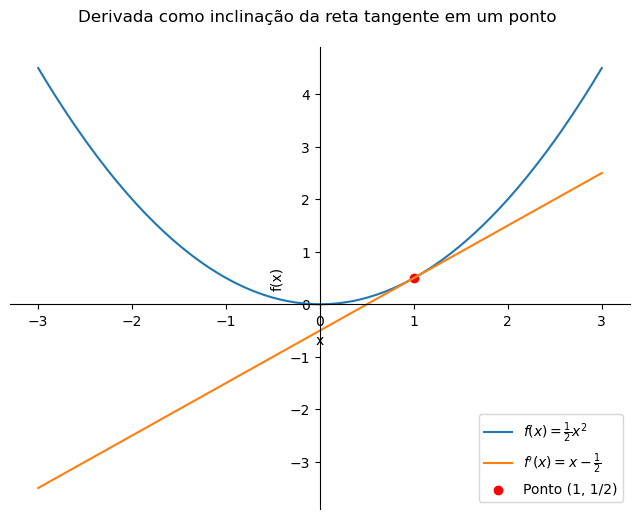

In [14]:
from sympy.plotting import plot
import matplotlib.pyplot as plt


def move_sympy_plot_to_axes(sympy_plot, plt_ax):
    """Moves a SymPy plot to a Matplotlib axes

    Adapted from: https://stackoverflow.com/a/46813804/8706250

    Parameters
    ----------
    sympy_plot : SymPy plot
    plt_ax : Matplotlib axes
    """

    backend = sympy_plot.backend(sympy_plot)
    backend.ax = plt_ax
    backend._process_series(backend.parent._series, plt_ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)


fig, ax = plt.subplots(figsize=(8, 6))

p1 = plot(f, (x, -3, 3), show=False, label=r'$f(x) = \frac{1}{2}x^2$')
p2 = plot(x-S('1/2'), (x, -3, 3), show=False, label=r"$f'(x) = x - \frac{1}{2}$")

move_sympy_plot_to_axes(p1, ax)
move_sympy_plot_to_axes(p2, ax)

ax.scatter(1, 1/2, color='red', label='Ponto (1, 1/2)')

ax.set_title('Derivada como inclinação da reta tangente em um ponto \n')
ax.legend()

plt.show()